## 데이터 및 라이브러리 로딩

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

In [3]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.4.3
설치 위치:  C:\Users\user\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\user\.matplotlib
캐시 위치:  C:\Users\user\.matplotlib


## 데이터탐색

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [6]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [7]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [10]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [11]:
plt.rcParams['font.family'] = 'Malgun Gothic'
num_d.plot(kind='bar')
plt.title('director')
plt.style.use(['seaborn'])
plt.show()

NameError: name 'num_d' is not defined

In [ ]:
corr = test.corr()
corr

In [12]:
plt.style.use(['seaborn'])
sns.clustermap(corr)

NameError: name 'corr' is not defined

In [13]:
num_t = test['director'].value_counts()[test['director'].value_counts() >= 2]
num_t

조성규    3
이정호    3
김형준    2
김태균    2
김미연    2
이준익    2
전규환    2
정재은    2
조정래    2
곽경택    2
민병훈    2
김진영    2
민규동    2
이한     2
정용기    2
김성훈    2
이병헌    2
권호영    2
김진만    2
이상우    2
장동홍    2
Name: director, dtype: int64

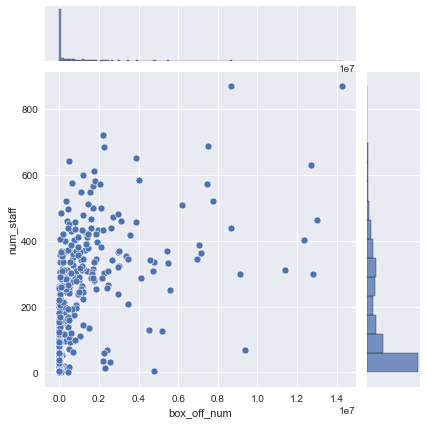

In [14]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='box_off_num', y='num_staff', data=train)

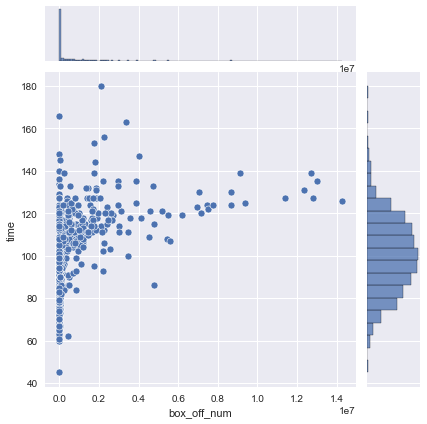

In [15]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='box_off_num', y='time', data=train)

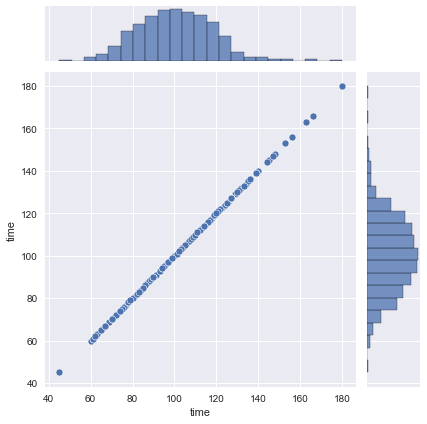

In [18]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='time', y='time', data=train)

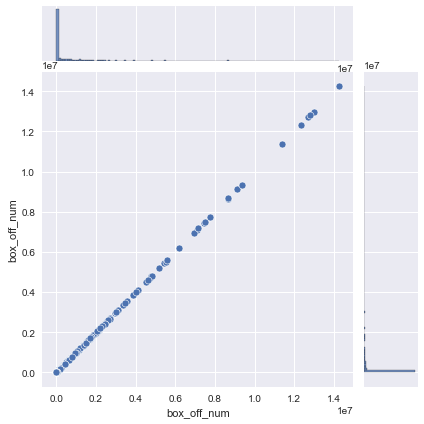

In [17]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='box_off_num', y='box_off_num', data=train)

In [16]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6.627000e+03
다큐멘터리,6.717226e+04
서스펜스,8.261100e+04
애니메이션,1.819267e+05
멜로/로맨스,4.259680e+05
미스터리,5.275482e+05
공포,5.908325e+05
드라마,6.256898e+05
코미디,1.193914e+06


In [19]:
pd.reset_option('display.float_format')
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


<AxesSubplot:>

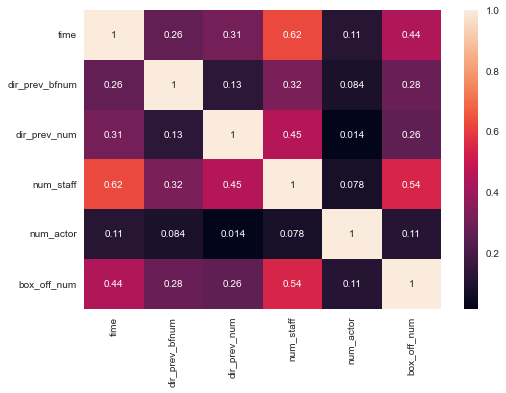

In [20]:
sns.heatmap(train.corr(), annot=True)

In [21]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [22]:
test.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor'],
      dtype='object')

In [23]:
submission.columns

Index(['title', 'box_off_num'], dtype='object')

In [24]:
train.box_off_num.sum()

424909051

In [25]:
train['box_off_num']

0        23398
1      7072501
2      6959083
3       217866
4       483387
        ...   
595    1475091
596    1716438
597       2475
598    2192525
599    7166532
Name: box_off_num, Length: 600, dtype: int64

In [26]:
train['box_off_num'].sum()

424909051

In [27]:
train['box_off_num'].mean()

708181.7516666667

In [28]:
train['box_off_num'].value_counts()

419        2
831        2
484        2
112        2
1250       2
          ..
100543     1
2192276    1
4941       1
6389       1
7166532    1
Name: box_off_num, Length: 586, dtype: int64

In [29]:
train['box_off_num'].value_counts(normalize = True) #비율 확인

419        0.003333
831        0.003333
484        0.003333
112        0.003333
1250       0.003333
             ...   
100543     0.001667
2192276    0.001667
4941       0.001667
6389       0.001667
7166532    0.001667
Name: box_off_num, Length: 586, dtype: float64

In [30]:
train['num_staff'].isnull().sum()

0

## 데이터 전처리

In [31]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [32]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [33]:
train = train.drop(['distributor'],axis= 1) #배급사 제거
test = test.drop(['distributor'],axis= 1)

In [35]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e3e2b95790>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3e2b95df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3e2b95340>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3e2ba1580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3e2ba1910>],
 'means': []}

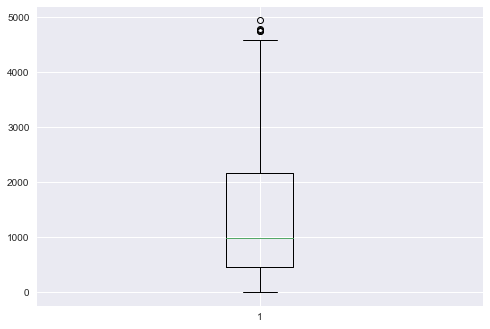

In [36]:
plt.style.use(['seaborn'])
under_5000 = train[train.box_off_num < 5000]
plt.boxplot(under_5000.box_off_num) #일원하는 수치 아래 데이터 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3e3bd5220>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3e3bd58b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3e3bc6e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3e3bd5fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3e3be03d0>],
 'means': []}

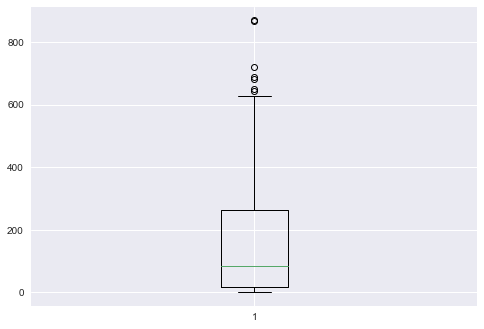

In [37]:
plt.style.use(['seaborn'])
under_5000 = train[train.num_staff < 5000]
plt.boxplot(under_5000.num_staff)

In [38]:
plt.style.use(['seaborn'])
plt.plot(train['box_off_num'].groupby(train['release_time']).sum())
plt.show()

KeyError: 'release_time'

In [39]:
# 원핫 인코딩
X_train = pd.get_dummies(columns=['director'], data = train)
y_test = pd.get_dummies(columns=['director'], data = test)

## 모델정의 및 학습

In [46]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(random_state = 42)

gbr = GradientBoostingRegressor(random_state=42)

rf = RandomForestRegressor(random_state=42)

md_label = ['XGBRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor']

all_md = [xgb, gbr, rf]

In [57]:
X = pd.DataFrame(train.data, columns=director.feature_names)
y = pd.DataFrame(test.target, columns=['box_off_num'])

AttributeError: 'DataFrame' object has no attribute 'data'

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

NameError: name 'X' is not defined

In [59]:
all_md.fit(X_train, y_train)

AttributeError: 'list' object has no attribute 'fit'

In [ ]:
train['box_off_num']
test['num_staff']
X = train['box_off_num']
y = test['num_staff']

In [ ]:
xgb_rgs = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_rgs.fit(X_train, y_train, eval_set = evals, eval_metric="mlogloss", early_stopping_rounds=400, verbose=False)

In [ ]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

In [ ]:
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy

# 학습 된 모델로 예측 데이터 생성

In [ ]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

## 제출파일 생성

In [ ]:
submission = pd.read_csv('/content/submission.csv')
submission

In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

In [ ]:
submission.to_csv('베이스라인.csv',index = False)